In [1]:
import pandas as pd

In [2]:
from sklearn.utils import shuffle
df = pd.read_feather("data_cleaned.feather", columns=None, use_threads=True)
df

,link,titulo,citacoes,ano,versao,y,CITACOES,DOC,HTML,LIVRO,PDF,algoritmos_geneticos,machine_learning
0,https://books.google.com.br/books?hl=pt-BR&lr=...,Algoritmos genéticos (2a ediçao),287,2008,9,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,http://www.biblioteca.uma.es/bbldoc/tesisuma/1...,Análisis y diseño de algoritmos genéticos para...,26,1999,8,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,https://www.colibri.udelar.edu.uy/jspui/handle...,Algoritmos genéticos paralelos y su aplicación...,18,2004,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,https://www.researchgate.net/profile/Marcos_Ge...,Introducción a los algoritmos genéticos,19,2000,11,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,https://www.redalyc.org/pdf/816/81690104.pdf,Sistemas recomendadores: Un enfoque desde los ...,22,2006,2,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://www.nature.com/articles/s41586-018-0337-2,Machine learning for molecular and materials s...,487,2018,14,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
196,https://ieeexplore.ieee.org/abstract/document/...,Speeding up distributed machine learning using...,338,2017,10,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
197,https://books.google.com.br/books?hl=pt-BR&lr=...,Multi-objective machine learning,213,2006,8,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
198,https://arxiv.org/abs/1605.07277,Transferability in machine learning: from phen...,589,2016,6,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Testando algumas features

In [3]:
X = df[['citacoes', 'ano']]
y = df.y

In [4]:
## 80% treino 20% teste
X_train = X[:160]
X_test = X[160:]
print(X_train.shape, X_test.shape)

(160, 2) (40, 2)


In [5]:
y_train = y[:160]
y_test = y[160:]

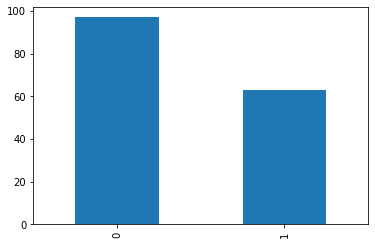

In [6]:
y_train.value_counts().plot(kind='bar')

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, random_state=1, class_weight="balanced")
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [8]:
predicted = dt.predict_proba(X_test)[:, 1]
predicted

array([0.81171548, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.27793696, 0.27793696, 1.        ,
       0.81171548, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.81171548, 1.        , 1.        , 0.81171548,
       1.        , 1.        , 0.27793696, 1.        , 0.81171548,
       1.        , 0.81171548, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.27793696, 0.81171548,
       1.        , 1.        , 0.81171548, 1.        , 0.81171548])

In [9]:
from sklearn.metrics import roc_auc_score, average_precision_score
auc = roc_auc_score(y_test, predicted)
ap = average_precision_score(y_test, predicted)

print("AUC: {} | Average Precision: {}".format(auc, ap))

AUC: 0.7202380952380952 | Average Precision: 0.8068783068783068


#### Observando alguns padrões através da árvore de decisão

[Text(409.19999999999993, 761.04, 'citacoes <= 48.5\ngini = 0.5\nsamples = 160\nvalue = [80.0, 80.0]\nclass = 1'),
 Text(223.2, 543.6, 'ano <= 2015.5\ngini = 0.243\nsamples = 93\nvalue = [69.278, 11.429]\nclass = 0'),
 Text(148.79999999999998, 326.15999999999997, 'citacoes <= 13.5\ngini = 0.179\nsamples = 90\nvalue = [69.278, 7.619]\nclass = 0'),
 Text(74.39999999999999, 108.72000000000003, 'gini = 0.0\nsamples = 56\nvalue = [46.186, 0.0]\nclass = 0'),
 Text(223.2, 108.72000000000003, 'gini = 0.373\nsamples = 34\nvalue = [23.093, 7.619]\nclass = 0'),
 Text(297.59999999999997, 326.15999999999997, 'gini = -0.0\nsamples = 3\nvalue = [0.0, 3.81]\nclass = 1'),
 Text(595.1999999999999, 543.6, 'ano <= 1998.5\ngini = 0.234\nsamples = 67\nvalue = [10.722, 68.571]\nclass = 1'),
 Text(446.4, 326.15999999999997, 'citacoes <= 84.5\ngini = 0.464\nsamples = 11\nvalue = [6.598, 3.81]\nclass = 0'),
 Text(371.99999999999994, 108.72000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 1.27]\nclass = 1'),

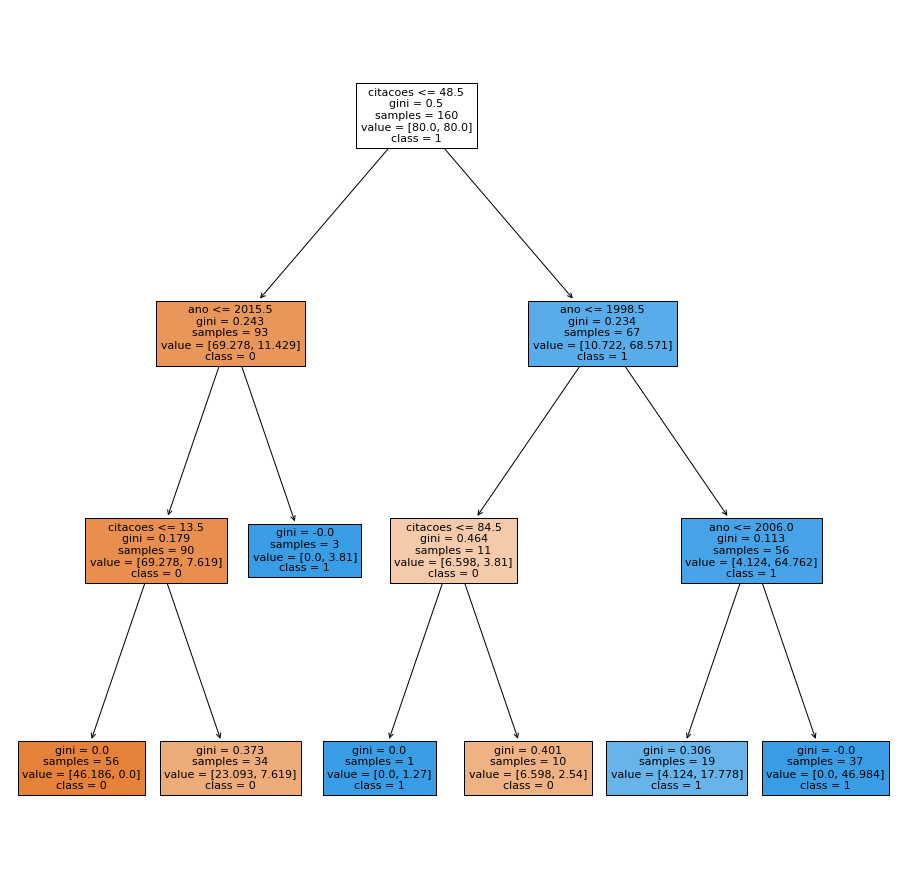

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
tree.plot_tree(dt, class_names=['0', '1'], feature_names=X.columns, filled=True)

### Alguns padrões encontrados:
* Documentos com muitas citações são recomendados;
* Documentos mais recentes também são recomendados.

### Trabalhando com as variáveis de texto

In [11]:
df_text = df.copy()
df_text.head()

,link,titulo,citacoes,ano,versao,y,CITACOES,DOC,HTML,LIVRO,PDF,algoritmos_geneticos,machine_learning
0,https://books.google.com.br/books?hl=pt-BR&lr=...,Algoritmos genéticos (2a ediçao),287,2008,9,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,http://www.biblioteca.uma.es/bbldoc/tesisuma/1...,Análisis y diseño de algoritmos genéticos para...,26,1999,8,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,https://www.colibri.udelar.edu.uy/jspui/handle...,Algoritmos genéticos paralelos y su aplicación...,18,2004,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,https://www.researchgate.net/profile/Marcos_Ge...,Introducción a los algoritmos genéticos,19,2000,11,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,https://www.redalyc.org/pdf/816/81690104.pdf,Sistemas recomendadores: Un enfoque desde los ...,22,2006,2,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### Vamos usar o TfidfVectorizer para a feature 'titulo'

In [12]:
titulo_treino = df_text['titulo']
titulo_treino

0                       Algoritmos genéticos (2a ediçao)
1      Análisis y diseño de algoritmos genéticos para...
2      Algoritmos genéticos paralelos y su aplicación...
3                Introducción a los algoritmos genéticos
4      Sistemas recomendadores: Un enfoque desde los ...
                             ...                        
195    Machine learning for molecular and materials s...
196    Speeding up distributed machine learning using...
197                     Multi-objective machine learning
198    Transferability in machine learning: from phen...
199    Using machine learning to break visual human i...
Name: titulo, Length: 200, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=2)
titulo_vec = vectorizer.fit_transform(titulo_treino)

In [14]:
titulo_vec.shape

(200, 178)

#### Temos o DataFrame (matriz) da ocorrência das palavras

In [15]:
df_titulo = pd.DataFrame(titulo_vec.toarray(), columns=vectorizer.get_feature_names())
df_titulo.head()

,against,agua,al,algorithms,algoritmo,algoritmos,an,and,análisis,aplicación,...,usando,using,utilizando,vector,weka,wireless,with,índices,óptima,óptimo
0,0.0,0.0,0.000000,0.0,0.0,0.699775,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.223680,0.0,0.0,0.578379,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.398226,0.0,0.0,0.189771,0.0,0.0,0.000000,0.377188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.401497,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.284225,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Juntamos esse DataFrame com o restante das features para testarmos

In [16]:
new_df = df_text.join(df_titulo)
new_df.shape

(200, 191)

In [17]:
new_df.head()

,link,titulo,citacoes,ano,versao,y,CITACOES,DOC,HTML,LIVRO,...,usando,using,utilizando,vector,weka,wireless,with,índices,óptima,óptimo
0,https://books.google.com.br/books?hl=pt-BR&lr=...,Algoritmos genéticos (2a ediçao),287,2008,9,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,http://www.biblioteca.uma.es/bbldoc/tesisuma/1...,Análisis y diseño de algoritmos genéticos para...,26,1999,8,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://www.colibri.udelar.edu.uy/jspui/handle...,Algoritmos genéticos paralelos y su aplicación...,18,2004,5,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://www.researchgate.net/profile/Marcos_Ge...,Introducción a los algoritmos genéticos,19,2000,11,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://www.redalyc.org/pdf/816/81690104.pdf,Sistemas recomendadores: Un enfoque desde los ...,22,2006,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_text = new_df.drop(['y', 'link', 'titulo'], axis=1)

In [19]:
X_text.shape

(200, 188)

In [20]:
X_text_train = X_text[:160]
X_text_test = X_text[160:]

print(X_text_train.shape, X_text_test.shape)

(160, 188) (40, 188)


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1, class_weight="balanced", n_jobs=2)
rf.fit(X_text_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [22]:
text_predict = rf.predict_proba(X_text_test)[:, 1]

In [23]:
auc = roc_auc_score(y_test, text_predict)
ap = average_precision_score(y_test, text_predict)

In [24]:
print("AUC: {} | Average Precision: {}".format(auc, ap))

AUC: 0.8080357142857143 | Average Precision: 0.9099431024720418


## Active Learning

#### Selecionando mais alguns registros

In [25]:
df_sem_labels = pd.read_csv("raw_data_com_labels.csv", index_col=0)
df_sem_labels = df_sem_labels[df_sem_labels['y'].isnull()].dropna(how='all')
df_sem_labels.shape

(200, 8)

In [26]:
df_sem_label_limpo = df_sem_labels.copy()

In [27]:
df_sem_label_limpo = df_sem_label_limpo.reset_index(drop=True)

In [28]:
df_sem_label_limpo.head(201)

,link,titulo,citacoes,ano,tipo_arquivo,versao,busca,y
0,https://www.academia.edu/download/55091016/alg...,Introducción a los algoritmos genéticos y la p...,['75'],['2010'],[LIVRO],['3'],algoritmos+geneticos,NaN
1,https://www.researchgate.net/profile/Pablo_Est...,Optimización mediante algoritmos genéticos,['51'],['1997'],[PDF],['2'],algoritmos+geneticos,NaN
2,http://it.uc3m.es/jvillena/irc/practicas/06-07...,Algoritmos genéticos,['18'],"['2007', '3']",[PDF],['5'],algoritmos+geneticos,NaN
3,http://cursos.itam.mx/akuri/PUBLICA.CNS/2000/A...,Algoritmos genéticos,['26'],['2002'],[LIVRO],['2'],algoritmos+geneticos,NaN
4,https://the-geek.org/docs/algen/algen.html,Algoritmos genéticos y computación evolutiva,['29'],['2004'],[HTML],['2'],algoritmos+geneticos,NaN
...,...,...,...,...,...,...,...,...
195,http://www.jmlr.org/papers/v11/rasmussen10a.html,Gaussian processes for machine learning (GPML)...,['629'],['2010'],[PDF],['15'],machine+learning,NaN
196,https://www.sciencedirect.com/science/article/...,Machine learning for medical diagnosis: histor...,['1122'],['2001'],[PDF],['12'],machine+learning,NaN
197,https://pubs.rsna.org/doi/abs/10.1148/rg.20171...,Machine learning for medical imaging,['299'],['2017'],[LIVRO],['7'],machine+learning,NaN
198,https://www.usenix.org/conference/usenixsecuri...,Stealing machine learning models via predictio...,['479'],"['25', '2016']",[LIVRO],['20'],machine+learning,NaN


### Limpando os dados

In [29]:
def clean_data(cols_list, char_list):
    for col in cols_list:
        for char in char_list:
            df_sem_label_limpo[col] = df_sem_label_limpo[col].str.replace(char, '')

In [30]:
cols_to_clean = ['citacoes', 'ano', 'tipo_arquivo', 'versao']
spec_chars = ["[", "]", "'", " "]

clean_data(cols_to_clean, spec_chars)
df_sem_label_limpo.head()

,link,titulo,citacoes,ano,tipo_arquivo,versao,busca,y
0,https://www.academia.edu/download/55091016/alg...,Introducción a los algoritmos genéticos y la p...,75,2010,LIVRO,3,algoritmos+geneticos,NaN
1,https://www.researchgate.net/profile/Pablo_Est...,Optimización mediante algoritmos genéticos,51,1997,PDF,2,algoritmos+geneticos,NaN
2,http://it.uc3m.es/jvillena/irc/practicas/06-07...,Algoritmos genéticos,18,"2007,3",PDF,5,algoritmos+geneticos,NaN
3,http://cursos.itam.mx/akuri/PUBLICA.CNS/2000/A...,Algoritmos genéticos,26,2002,LIVRO,2,algoritmos+geneticos,NaN
4,https://the-geek.org/docs/algen/algen.html,Algoritmos genéticos y computación evolutiva,29,2004,HTML,2,algoritmos+geneticos,NaN


In [31]:
cols_to_convert = ['citacoes', 'versao']
df_sem_label_limpo[cols_to_convert] = df_sem_label_limpo[cols_to_convert].astype('int64')

In [32]:
df_sem_label_limpo.dtypes

link             object
titulo           object
citacoes          int64
ano              object
tipo_arquivo     object
versao            int64
busca            object
y               float64
dtype: object

In [33]:
for i in df_sem_label_limpo['ano']:
    if(len(i)>4):
        print(i)

2007,3
85,2002
2009,150,214,190,154
2014,2014
2010,3
94,1994
4,2011
02,2002
2010,2010
2006,2006
2014,47,2014
8,2003
2008,1
1611,01236,2016
2000,2000
40,2002
25,2016


In [34]:
coluna_ano = df_sem_label_limpo['ano'].copy()

In [35]:
import re

for i in range(len(coluna_ano)):
    print(i)
    if(len(coluna_ano[i])>4):
        res = re.findall(r'\d{4}', coluna_ano[i])
        if(len(res)>1):
            coluna_ano[i] = res[len(res)-1]
        else:
            coluna_ano[i] = res[0]
print(coluna_ano)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0      2010
1      1997
2      2007
3      2002
4      2004
       ... 
195    2010
196    2001
197    2017
198    2016
199    2006
Name: ano, Length: 200, dtype: object


In [36]:
df_sem_label_limpo['ano'] = coluna_ano

In [37]:
df_sem_label_limpo.head(120)

,link,titulo,citacoes,ano,tipo_arquivo,versao,busca,y
0,https://www.academia.edu/download/55091016/alg...,Introducción a los algoritmos genéticos y la p...,75,2010,LIVRO,3,algoritmos+geneticos,NaN
1,https://www.researchgate.net/profile/Pablo_Est...,Optimización mediante algoritmos genéticos,51,1997,PDF,2,algoritmos+geneticos,NaN
2,http://it.uc3m.es/jvillena/irc/practicas/06-07...,Algoritmos genéticos,18,2007,PDF,5,algoritmos+geneticos,NaN
3,http://cursos.itam.mx/akuri/PUBLICA.CNS/2000/A...,Algoritmos genéticos,26,2002,LIVRO,2,algoritmos+geneticos,NaN
4,https://the-geek.org/docs/algen/algen.html,Algoritmos genéticos y computación evolutiva,29,2004,HTML,2,algoritmos+geneticos,NaN
...,...,...,...,...,...,...,...,...
115,https://books.google.com.br/books?hl=pt-BR&lr=...,Elements of machine learning,798,1996,LIVRO,3,machine+learning,NaN
116,https://dl.acm.org/citation.cfm?id=2361796,Machine learning in action,592,2012,LIVRO,5,machine+learning,NaN
117,https://link.springer.com/chapter/10.1007/3-54...,Ensemble methods in machine learning,6124,2000,LIVRO,39,machine+learning,NaN
118,https://www.aaai.org/Papers/Symposia/Fall/1994...,Selection of relevant features in machine lear...,4346,1994,PDF,46,machine+learning,NaN


In [38]:
df_sem_label_limpo['ano'].astype('int32')

0      2010
1      1997
2      2007
3      2002
4      2004
       ... 
195    2010
196    2001
197    2017
198    2016
199    2006
Name: ano, Length: 200, dtype: int32

In [39]:
encoded_columns = df_sem_label_limpo[['tipo_arquivo', 'busca']]
print(encoded_columns)

    tipo_arquivo                 busca
0          LIVRO  algoritmos+geneticos
1            PDF  algoritmos+geneticos
2            PDF  algoritmos+geneticos
3          LIVRO  algoritmos+geneticos
4           HTML  algoritmos+geneticos
..           ...                   ...
195          PDF      machine+learning
196          PDF      machine+learning
197        LIVRO      machine+learning
198        LIVRO      machine+learning
199        LIVRO      machine+learning

[200 rows x 2 columns]


In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

enc_columns = pd.DataFrame(encoder.fit_transform(encoded_columns).toarray())
enc_columns.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
new_labels = ['CITACAO', 'DOC', 'HTML', 'LIVRO', 'PDF', 'algoritmos_geneticos', 'machine_learning']
enc_columns.columns = new_labels

In [42]:
df_sem_label_limpo = df_sem_label_limpo.join(enc_columns)
df_sem_label_limpo.head()

,link,titulo,citacoes,ano,tipo_arquivo,versao,busca,y,CITACAO,DOC,HTML,LIVRO,PDF,algoritmos_geneticos,machine_learning
0,https://www.academia.edu/download/55091016/alg...,Introducción a los algoritmos genéticos y la p...,75,2010,LIVRO,3,algoritmos+geneticos,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,https://www.researchgate.net/profile/Pablo_Est...,Optimización mediante algoritmos genéticos,51,1997,PDF,2,algoritmos+geneticos,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,http://it.uc3m.es/jvillena/irc/practicas/06-07...,Algoritmos genéticos,18,2007,PDF,5,algoritmos+geneticos,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,http://cursos.itam.mx/akuri/PUBLICA.CNS/2000/A...,Algoritmos genéticos,26,2002,LIVRO,2,algoritmos+geneticos,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,https://the-geek.org/docs/algen/algen.html,Algoritmos genéticos y computación evolutiva,29,2004,HTML,2,algoritmos+geneticos,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
df_sem_label_limpo = df_sem_label_limpo.drop(columns=['tipo_arquivo', 'busca'])
df_sem_label_limpo.head()

,link,titulo,citacoes,ano,versao,y,CITACAO,DOC,HTML,LIVRO,PDF,algoritmos_geneticos,machine_learning
0,https://www.academia.edu/download/55091016/alg...,Introducción a los algoritmos genéticos y la p...,75,2010,3,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,https://www.researchgate.net/profile/Pablo_Est...,Optimización mediante algoritmos genéticos,51,1997,2,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,http://it.uc3m.es/jvillena/irc/practicas/06-07...,Algoritmos genéticos,18,2007,5,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,http://cursos.itam.mx/akuri/PUBLICA.CNS/2000/A...,Algoritmos genéticos,26,2002,2,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,https://the-geek.org/docs/algen/algen.html,Algoritmos genéticos y computación evolutiva,29,2004,2,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [44]:
df_sem_label_limpo = df_sem_label_limpo.join(df_titulo)

In [45]:
df_sem_label_limpo = df_sem_label_limpo.drop(['link', 'titulo', 'y'], axis=1)
df_sem_label_limpo.head()

,citacoes,ano,versao,CITACAO,DOC,HTML,LIVRO,PDF,algoritmos_geneticos,machine_learning,...,usando,using,utilizando,vector,weka,wireless,with,índices,óptima,óptimo
0,75,2010,3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51,1997,2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18,2007,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,2002,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,2004,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df_sem_label_limpo.shape

(200, 188)

In [47]:
X_sem_label = df_sem_label_limpo[160:]

In [48]:
p = rf.predict_proba(X_sem_label)[:, 1]
p

array([0.833, 0.796, 0.86 , 0.552, 0.918, 0.949, 0.91 , 0.862, 0.744,
       0.846, 0.876, 0.973, 0.769, 0.832, 0.823, 0.847, 0.921, 0.777,
       0.986, 0.883, 0.815, 0.936, 0.801, 0.969, 0.945, 0.948, 0.749,
       0.835, 0.853, 0.838, 0.933, 0.897, 0.89 , 0.84 , 0.598, 0.957,
       0.747, 0.921, 0.973, 0.95 ])

In [49]:
df_sem_label_ver = df_sem_labels.reset_index(drop=True)
df_sem_label_ver = df_sem_label_ver[160:]

In [50]:
df_sem_label_ver['p'] = p
df_sem_label_ver.head()

,link,titulo,citacoes,ano,tipo_arquivo,versao,busca,y,p
160,https://dl.acm.org/doi/fullHtml/10.1145/319382...,Machine learning and data mining,['493'],['1999'],[HTML],['28'],machine+learning,NaN,0.833
161,http://folk.uio.no/plison/pdfs/talks/machinele...,An introduction to machine learning,['394'],['2015'],[PDF],['3'],machine+learning,NaN,0.796
162,https://arxiv.org/abs/1603.04467,Tensorflow: Large-scale machine learning on he...,['4912'],['2016'],[PDF],['6'],machine+learning,NaN,0.860
163,https://www.sciencedirect.com/science/article/...,"The immune system, adaptation, and machine lea...",['1966'],['1986'],[PDF],['11'],machine+learning,NaN,0.552
164,https://books.google.com.br/books?hl=pt-BR&lr=...,Machine learning: a theoretical approach,['456'],['2014'],[LIVRO],['6'],machine+learning,NaN,0.918


### De maneira geral o modelo se saiu bem. No entanto, abaixo podemos ver alguns registros onde o modelo possui alguma dificuldade de generalizar

In [62]:
df_sem_label_ver[df_sem_label_ver['p']<=0.75]

,link,titulo,citacoes,ano,tipo_arquivo,versao,busca,y,p
163,https://www.sciencedirect.com/science/article/...,"The immune system, adaptation, and machine lea...",['1966'],['1986'],[PDF],['11'],machine+learning,NaN,0.552
168,https://researchcommons.waikato.ac.nz/handle/1...,Practical feature subset selection for machine...,['486'],['1998'],[LIVRO],['2'],machine+learning,NaN,0.744
186,https://infoscience.epfl.ch/record/82802/files...,Torch: a modular machine learning software lib...,['490'],['2002'],[PDF],['8'],machine+learning,NaN,0.749
194,http://www.temida.si/~bojan/_resources/Cestnik...,Estimating probabilities: a crucial task in ma...,['666'],['1990'],[PDF],['5'],machine+learning,NaN,0.598
196,https://www.sciencedirect.com/science/article/...,Machine learning for medical diagnosis: histor...,['1122'],['2001'],[PDF],['12'],machine+learning,NaN,0.747


#### Podemos observar que o modelo tem mais dificuldade em exemplos onde o número de citações é grande e que foram publicados a muitos anos atrás

#### Neste sentido vamos realizar mais uma etapa de labeling e observar se o modelo consegue aumentar sua capacidade de generalização

### Geramos o CSV para fazer as novas anotações

In [64]:
df_sem_label_ver.to_csv("data_active_learning.csv")